# Unsupervised Learning Capstone

In this capstone, we will be examining a large amount of texts with varying characteristics, and we will be using clustering and unsupervised learning techniques to classify the texts.

The corpus that we chose to examine is pulled from the NLTK corpus, and it consists of texts from 500 different sources.  Each of these sources has been categorized into one of fifteen different genre.  

WE want to see if the natural language processing, clustering, and unsupervised techniques we learned can be used to find patterns in the text of each genre and be able to categorize the text into each genre accurately.

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import spacy
from collections import Counter

In [2]:
# Import the corpus
from nltk.corpus import brown, stopwords

In [4]:
# Review the genres in the corpus
print(len(brown.categories()))
brown.categories()

15


['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [5]:
# Create a DataFrame
df = pd.DataFrame()

# Populate the DataFrame with the fileids
df['ID'] = brown.fileids()
print(len(df))
df['ID'].head()

500


0    ca01
1    ca02
2    ca03
3    ca04
4    ca05
Name: ID, dtype: object

In [7]:
# In order to access the corpus, we need to specify that the text in each fileid be read

text = [] # Create an empty list where the text can be stored
for each in df['ID']:
    txt = brown.words(fileids = [each]) # This returns the text based on the fileid 
    txt = [i.lower() for i in txt]
    txt = ' '.join(txt)
    text.append(txt) # Add the text to the list   

df['text'] = text # Create a new column in the DataFrame
df.head()

,ID,text
0,ca01,the fulton county grand jury said friday an in...
1,ca02,"austin , texas -- committee approval of gov. p..."
2,ca03,several defendants in the summerdale police bu...
3,ca04,oslo the most positive element to emerge from ...
4,ca05,east providence should organize its civil defe...


In [8]:
# Populate the DataFrame with the genre of the text
categories = []
for each in df['ID']:
    cat = brown.categories(fileids = [each])
    cat = ' '.join(cat)
    categories.append(cat)

df['genre'] = categories

df.head() # Take a look at the DataFrame to see what we have.

,ID,text,genre
0,ca01,the fulton county grand jury said friday an in...,news
1,ca02,"austin , texas -- committee approval of gov. p...",news
2,ca03,several defendants in the summerdale police bu...,news
3,ca04,oslo the most positive element to emerge from ...,news
4,ca05,east providence should organize its civil defe...,news


In [22]:
# Lets take a look at the number of texts per genre
df['genre'].value_counts()

learned            80
belles_lettres     75
lore               48
news               44
hobbies            36
government         30
romance            29
fiction            29
adventure          29
editorial          27
mystery            24
reviews            17
religion           17
humor               9
science_fiction     6
Name: genre, dtype: int64

There are not many reviews or religion texts and even fewer humor and science fiction texts.  This could make it very hard for the clustering and unsupervised techniques to accurately classifiy these texts, and it could lead to confusion in the classification of texts from the other genre as well.  We will proceed with this in mind and remove those categories of genre if necessary.

Now that we have created a DataFrame that includes both the corpus and genre from each text, we can begin to examine the text and use the techniques we learned to classify each text according to genre.  We will start with the clustering technique.

# Clustering

In [9]:
# import the tfidf vectorizer from sklearn and set the parameters
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                            max_df=0.5, # drop words that occur in more than half the paragraphs
                            min_df=2, # only use words that appear at least twice
                            lowercase=False, # do not convert everything to lowercase
                            use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                            norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                            smooth_idf=True, #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                                  )

In [11]:
# 
labels = df.genre
true_k = np.unique(labels).shape[0]
X = tfidf_vectorizer.fit_transform(df['text'])

In [13]:
# Use truncated SVD to perform latent semantic analysis
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(true_k)
lsa = make_pipeline(svd,Normalizer(copy=False))

X = lsa.fit_transform(X)

In [14]:
# Start with KMeans clustering; set the parameters
from sklearn.cluster import KMeans

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# Take a look at the group labels assigned in clustering
km.labels_

array([ 9,  9,  9,  0,  9,  9,  0,  9,  9,  9, 11, 11, 11, 11, 11, 12, 12,
       12,  9,  9, 12, 12, 12,  9,  9,  6,  6,  6, 12, 12,  4,  8, 12,  0,
        5,  6,  0, 11, 11,  9,  0,  0,  6,  5,  0,  0,  0,  0,  0,  0,  0,
        4,  9, 11,  0,  4,  3,  9,  9,  9,  9,  0,  0,  0,  0,  0,  0,  8,
        0,  0,  0,  8,  8,  8,  8,  2,  8,  8,  8,  8,  8,  8,  8,  8,  8,
       13,  0,  3,  2,  4,  4,  4, 14,  4,  4,  2,  4, 14,  2,  5,  3, 14,
        2,  4,  4,  3,  3,  0,  8, 12,  6,  7,  7, 10,  3, 13, 13, 13,  3,
        3,  3,  3, 13,  3,  3,  3,  8,  3,  5,  3,  2,  3,  6,  5,  6,  5,
        6,  6,  3,  3,  6,  2, 13,  2,  3, 13,  2,  2,  2, 13, 12,  3,  2,
        6, 14, 14, 13, 13, 13, 14,  9,  3, 13,  0,  0,  5,  3,  3,  9, 12,
        5, 12, 12,  5,  3, 13,  1,  4, 11,  2,  6, 13, 14,  8,  5, 13,  0,
       12, 14, 14, 14,  0,  1, 13,  8, 14, 14,  2, 14,  2,  2,  2,  1,  2,
        2, 14,  8,  2,  2, 14, 14,  2,  0,  2,  2, 13, 14, 14,  2, 10, 12,
        2,  8,  0,  9, 13

(array([ 89.,  53.,  61.,  22.,  38.,  51.,  30.,  81.,  21.,  54.]),
 array([  0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,  11.2,
         12.6,  14. ]),
 <a list of 10 Patch objects>)

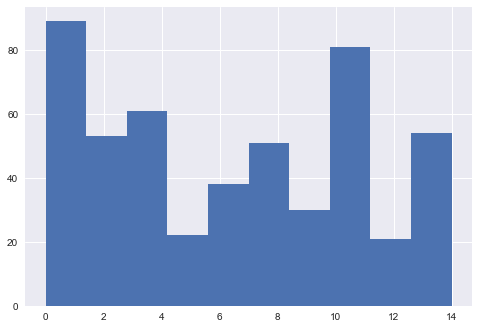

In [20]:
# Lets look at the distribution of the labels
plt.hist(km.labels_)

In [16]:
# Lets look at some different metrics to measure the performance of KMeans clustering
from sklearn import metrics

# metric of label giving ground truth
metrics.homogeneity_score(labels, km.labels_)

0.40538966494640749

In [17]:
metrics.completeness_score(labels, km.labels_)

0.39306231713457851

In [18]:
metrics.v_measure_score(labels, km.labels_)

0.39913082971114305

In [19]:
# rand index adjusted for change
metrics.adjusted_rand_score(labels, km.labels_)

0.16730688954317716

In [21]:
# Lets make a crosstab that will help us analyze the performance of the clustering

# create a column of the group labels assigned in clustering
df['k'] = km.labels_ 

pd.crosstab(df['k'], df['genre'])

genre,adventure,belles_lettres,editorial,fiction,government,hobbies,humor,learned,lore,mystery,news,religion,reviews,romance,science_fiction
k,,,,,,,,,,,,,,,
0,0,5,17,0,4,1,0,3,3,0,6,0,1,0,0
1,22,2,0,7,0,0,1,1,1,10,0,0,0,4,1
2,0,22,0,0,0,1,1,16,7,0,0,4,1,0,1
3,0,0,1,0,2,15,0,16,6,0,0,1,1,0,0
4,0,3,2,4,0,0,0,0,1,0,1,8,0,0,0
5,0,1,0,0,3,3,0,8,4,0,2,1,0,0,0
6,0,0,0,0,17,6,0,8,2,0,5,0,0,0,0
7,0,0,0,0,1,2,0,19,0,0,0,0,0,0,0
8,0,6,1,1,0,2,1,3,1,0,1,0,13,0,0


It is apparent that KMeans clustering is having a difficult time clustering the texts based on genre.  It is having a particularly difficult time clustering belles lettres, hobbies, learned, and lore, with texts clustered in ten or more different groups.  It appears that certain genre tend to be clustered together in larger groups, including the following:
- belles lettres and learned (k = 2, 13)
- adventure, fiction and mystery (k = 1, 10)
- hobbies and learned (k = 3)
- fiction and romance (k = 10)

None of the clusters are particularly 'pure' in the sense that they contain only one genre.  Only two clusters included fewer than five genre.  The breakdown according to purity is as follows:
- k0:  8 (number of genre in the cluster)
- k1:  9
- k2:  8
- k3:  7
- k4:  6
- k5:  7
- k6:  5
- k7:  3
- k8:  9
- k9:  6
- k10: 8
- k11: 4
- k12: 7
- k13: 6
- k14: 5

# Unsupervised Learning

In [23]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

text_train, text_test, categories_train, categories_test = train_test_split(
    text, categories, test_size=0.25, random_state=42, stratify=categories)

In [24]:
# Use sklearn.tfidfvectorizer to vectorize the data
vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case 
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
train_tfidf=vectorizer.fit_transform(text_train)
print("Number of features: %d" % train_tfidf.get_shape()[1])

test_tfidf = vectorizer.transform(text_test)
print("Number of features: %d" % test_tfidf.get_shape()[1])

Number of features: 18959
Number of features: 18959


In [42]:
# Run supervised models on the vectorized data

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
fit = rfc.fit(train_tfidf, categories_train)
predict = rfc.predict(test_tfidf)
score = rfc.score(test_tfidf, categories_test)

print('Random Forest Classifier Score: {}'.format(score))

Random Forest Classifier Score: 0.328


In [28]:
# Cross-validate
from sklearn.model_selection import cross_val_score

vector_text = vectorizer.fit_transform(text)
cross_val_rfc = cross_val_score(rfc, vector_text, categories)
print('Cross Validated Scores: {}'.format(cross_val_rfc))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_rfc.mean(), cross_val_rfc.std() * 2))

Cross Validated Scores: [ 0.30177515  0.27218935  0.27160494]
Accuracy: 0.28 (+/- 0.03)


In [32]:
# SVC
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
fit_svc = svc.fit(train_tfidf, categories_train)
predict_svc = svc.predict(test_tfidf)
score_svc = svc.score(test_tfidf, categories_test)
print('SVC Score: {}'.format(score_svc))

SVC Score: 0.504


In [31]:
# Cross-validate
cross_val_svc = cross_val_score(svc, vector_text, categories)
print('Cross Validated Scores: {}'.format(cross_val_svc))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_svc.mean(), cross_val_svc.std() * 2))

Cross Validated Scores: [ 0.42011834  0.37278107  0.36419753]
Accuracy: 0.39 (+/- 0.05)


In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
fit_lr = lr.fit(train_tfidf, categories_train)
predict_lr = lr.predict(test_tfidf)
score_lr = lr.score(test_tfidf, categories_test)
print('Logistic Regression Score: {}'.format(score_lr))

Logistic Regression Score: 0.392


In [34]:
# Cross-validate
cross_val_lr = cross_val_score(lr, vector_text, categories)
print('Cross Validated Scores: {}'.format(cross_val_lr))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_lr.mean(), cross_val_lr.std() * 2))

Cross Validated Scores: [ 0.30769231  0.30177515  0.29012346]
Accuracy: 0.30 (+/- 0.01)


In [35]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
fit_knn = knn.fit(train_tfidf, categories_train)
predict_knn = knn.predict(test_tfidf)
score_knn = knn.score(test_tfidf, categories_test)
print('KNN Classifier Score: {}'.format(score_knn))

KNN Classifier Score: 0.504


In [36]:
# Cross-validate
cross_val_knn = cross_val_score(knn, vector_text, categories)
print('Cross Validated Scores: {}'.format(cross_val_knn))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_knn.mean(), cross_val_knn.std() * 2))

Cross Validated Scores: [ 0.52662722  0.37869822  0.31481481]
Accuracy: 0.41 (+/- 0.18)


In [37]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
fit_gbc = gbc.fit(train_tfidf.toarray(), categories_train)
predict_gbc = gbc.predict(test_tfidf.toarray())
score_gbc = gbc.score(test_tfidf.toarray(), categories_test)
print('Gradient Boosting Classifier Score: {}'.format(score_gbc))

Gradient Boosting Classifier Score: 0.312


In [39]:
# Cross-validate
cross_val_gbc = cross_val_score(gbc, vector_text.toarray(), categories)
print('Cross Validated Scores: {}'.format(cross_val_gbc))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_gbc.mean(), cross_val_gbc.std() * 2))

Cross Validated Scores: [ 0.33727811  0.36094675  0.24074074]
Accuracy: 0.31 (+/- 0.10)


When we run the unsupervised models on the texts we get pretty terrible results.  The best results come from the SVC and KNN models, but even their scores were barely above 0.500.  There just does not seem to be enough variation in the texts for the models to differentiate them based on genre.  Perhaps, as the clusters above suggest, the models are getting certain similar genres mixed up.  Furthermore, the fact that there are so few science fiction, humor, reviews, and religion texts that the models cannot be adequately trained to clasify them, and therefore the whole model is suffering.  We will test this by dropping all the science fiction, humor, reviews, and religion texts, and we will combine adventure, fiction, mystery, and romance under the title fiction.

In [40]:
# Create a new DataFrame
df1 = df

# Drop all rows that contain a science fiction, humor, reviews, or religion text
drop_list = ['science_fiction', 'humor', 'reviews', 'religion']
for each in drop_list:
    df1 = df1[df1.genre != each]

# Rename all adventure, mystery, and romance titles
replace_list = ['adventure', 'mystery', 'romance']
for each in replace_list:
    df1 = df1.replace(each, 'fiction')

# Count the number of texts from each genre
print(df1['genre'].value_counts())

fiction           111
learned            80
belles_lettres     75
lore               48
news               44
hobbies            36
government         30
editorial          27
Name: genre, dtype: int64


In [41]:
# Create variables for the text and genre in the new DataFrame
text1 = df1['text']
categories1 = df1['genre']

# Split the data into training and test sets
text_train1, text_test1, categories_train1, categories_test1 = train_test_split(
    text1, categories1, test_size=0.25, random_state=42, stratify=categories1)

#Applying the vectorizer
train_tfidf1 = vectorizer.fit_transform(text_train1)
print("Number of features: %d" % train_tfidf1.get_shape()[1])

test_tfidf1 = vectorizer.transform(text_test1)
print("Number of features: %d" % test_tfidf1.get_shape()[1])

Number of features: 17461
Number of features: 17461


In [43]:
# Run the supervised model on the vectorized data in the new DataFrame

# Random forest classifier
fit_rfc1 = rfc.fit(train_tfidf1, categories_train1)
predict_rfc1 = rfc.predict(test_tfidf1)
score_rfc1 = rfc.score(test_tfidf1, categories_test1)

print('Random Forest Classifier Score: {}'.format(score_rfc1))

Random Forest Classifier Score: 0.5132743362831859


In [44]:
# Cross-validate
vector_text1 = vectorizer.fit_transform(text1)
cross_val_rfc1 = cross_val_score(rfc, vector_text1, categories1)
print('Cross Validated RFC Scores: {}'.format(cross_val_rfc1))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_rfc1.mean(), cross_val_rfc1.std() * 2))

Cross Validated Scores: [ 0.52317881  0.41059603  0.4966443 ]
Accuracy: 0.48 (+/- 0.10)


In [45]:
# SVC
fit_svc1 = svc.fit(train_tfidf1, categories_train1)
predict_svc1 = svc.predict(test_tfidf1)
score_svc1 = svc.score(test_tfidf1, categories_test1)
print('SVC Score: {}'.format(score_svc1))

SVC Score: 0.6371681415929203


In [46]:
# Cross-validate
cross_val_svc1 = cross_val_score(svc, vector_text1, categories1)
print('Cross Validated SVC Scores: {}'.format(cross_val_svc1))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_svc1.mean(), cross_val_svc1.std() * 2))

Cross Validated SVC Scores: [ 0.62913907  0.53642384  0.55704698]
Accuracy: 0.57 (+/- 0.08)


In [47]:
# Logistic Regression
fit_lr1 = lr.fit(train_tfidf1, categories_train1)
predict_lr1 = lr.predict(test_tfidf1)
score_lr1 = lr.score(test_tfidf1, categories_test1)
print('Logistic Regression Score: {}'.format(score_lr1))

Logistic Regression Score: 0.4778761061946903


In [48]:
# Cross-validate
cross_val_lr1 = cross_val_score(lr, vector_text1, categories1)
print('Cross Validated LR Scores: {}'.format(cross_val_lr1))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_lr1.mean(), cross_val_lr1.std() * 2))

Cross Validated LR Scores: [ 0.52980132  0.42384106  0.46308725]
Accuracy: 0.47 (+/- 0.09)


In [51]:
# KNN Classifier
fit_knn1 = knn.fit(train_tfidf1, categories_train1)
predict_knn1 = knn.predict(test_tfidf1)
score_knn1 = knn.score(test_tfidf1, categories_test1)
print('KNN Classifier Score: {}'.format(score_knn1))

KNN Classifier Score: 0.6460176991150443


In [52]:
# Cross-validate
cross_val_knn1 = cross_val_score(knn, vector_text1, categories1)
print('Cross Validated KNN Classifier Scores: {}'.format(cross_val_knn1))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_knn1.mean(), cross_val_knn1.std() * 2))

Cross Validated KNN Classifier Scores: [ 0.60927152  0.52980132  0.52348993]
Accuracy: 0.55 (+/- 0.08)


In [49]:
# Gradient boosting classifier
fit_gbc1 = gbc.fit(train_tfidf1.toarray(), categories_train1)
predict_gbc1 = gbc.predict(test_tfidf1.toarray())
score_gbc1 = gbc.score(test_tfidf1.toarray(), categories_test1)
print('Gradient Boosting Classifier Score: {}'.format(score_gbc1))

Gradient Boosting Classifier Score: 0.5486725663716814


In [50]:
# Cross-validate
cross_val_gbc1 = cross_val_score(gbc, vector_text1.toarray(), categories1)
print('Cross Validated GBC Scores: {}'.format(cross_val_gbc1))
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_gbc1.mean(), cross_val_gbc1.std() * 2))

Cross Validated GBC Scores: [ 0.54966887  0.52980132  0.45637584]
Accuracy: 0.51 (+/- 0.08)


Dropping science fiction, humor, reviews, and religion, as well as combining adventure, fiction, mystery, and romance, increased the accuracy of the unsupervised models.  That being said, the models are still performing very poorly.  The SVC and KNN models were still the best performing models with a scores of only 0.637 and 0.646, respectively.  However, the increased performance of each of the models suggests that dropping genres with few texts and combining similar genres together was, in fact, effective in improving the performance of the models.

In order to try to continue to improve the performance of the models, we will add more features using the bag-of-words method.

In [53]:
# Utility function to create a list of the 10 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(11)]

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df_bow = pd.DataFrame(columns=common_words)
    df_bow['text'] = df_new['text']
    df_bow.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, corp in enumerate(df_bow['text']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in corp
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df_bow.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df_bow

In [55]:
# Create DataFrames that isolate texts be genre

# fiction
df_fic = df1
df_fic = df_fic[df_fic.genre == 'fiction' ]

# learned
df_learn = df1
df_learn = df_learn[df_learn.genre == 'learned']

# belles_lettres
df_bell = df1
df_bell = df_bell[df_bell.genre == 'belles_lettres']

# lore
df_lore = df1
df_lore = df_lore[df_lore.genre == 'lore']

# news
df_news = df1
df_news = df_news[df_news.genre == 'news']

# hobbies
df_hob = df1
df_hob = df_hob[df_hob.genre == 'hobbies']

# government
df_gov = df1
df_gov = df_gov[df_gov.genre == 'government']

# editorial
df_ed = df1
df_ed = df_ed[df_ed.genre == 'editorial']

In [59]:
# Combine all the texts from each genre. Parse each newly created text.
# Remove the `` from the text because it pops up as one of the most common words for each
# genre.
nlp = spacy.load('en')

df_fic['text'] = df_fic['text'].str.replace('``', '')
fiction = ''.join(df_fic['text'].tolist())
fiction = nlp(fiction)

df_learn['text'] = df_learn['text'].str.replace('``', '')
learned = ''.join(df_learn['text'].tolist())
learned = nlp(learned)

df_bell['text'] = df_bell['text'].str.replace('``', '')
belles = ''.join(df_bell['text'].tolist())
belles = nlp(belles)

#lore
df_lore['text'] = df_lore['text'].str.replace('``', '')
lore = ''.join(df_lore['text'].tolist())
lore = nlp(lore)

# news
df_news['text'] = df_news['text'].str.replace('``', '')
news = ''.join(df_news['text'].tolist())
news = nlp(news)

#hob
df_hob['text'] = df_hob['text'].str.replace('``', '')
hobbies = ''.join(df_hob['text'].tolist())
hobbies = nlp(hobbies)

df_gov['text'] = df_gov['text'].str.replace('``', '')
government= ''.join(df_gov['text'].tolist())
government = nlp(government)

df_ed['text'] = df_ed['text'].str.replace('``', '')
editorial = ''.join(df_ed['text'].tolist())
editorial = nlp(editorial)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [66]:
# Run all the parsed texts through the bag-of-words function to find the most common words
# for each genre.
fiction_bow = bag_of_words(fiction)
learned_bow = bag_of_words(learned)
belles_bow = bag_of_words(belles)
lore_bow = bag_of_words(lore)
news_bow = bag_of_words(news)
hobbies_bow = bag_of_words(hobbies)
government_bow = bag_of_words(government)
editorial_bow = bag_of_words(editorial)

# Combine the bags to create a set of unique words
common_words = set(fiction_bow + learned_bow + belles_bow + lore_bow + news_bow + hobbies_bow + government_bow + editorial_bow)

In [60]:
# Parse each of the texts individually

# Fiction
rar_list = []
for each in df_fic['text']:
    rar_list.append(each)
rar_list1 = []
for each in rar_list:
    t = nlp(each)
    rar_list1.append(t)
df_fic['text'] = rar_list1

# Learned
star_list = []
for each in df_learn['text']:
    star_list.append(each)
sun_list = []
for each in star_list:
    t = nlp(each)
    sun_list.append(t)
df_learn['text'] = sun_list

# Belles Lettres
star_list1 = []
for each in df_bell['text']:
    star_list1.append(each)
sun_list1 = []
for each in star_list1:
    t = nlp(each)
    sun_list1.append(t)
df_bell['text'] = sun_list1

# Lore
star_list2 = []
for each in df_lore['text']:
    star_list2.append(each)
sun_list2 = []
for each in star_list2:
    t = nlp(each)
    sun_list2.append(t)
df_lore['text'] = sun_list2

# News
star_list3 = []
for each in df_news['text']:
    star_list3.append(each)
sun_list3 = []
for each in star_list3:
    t = nlp(each)
    sun_list3.append(t)
df_news['text'] = sun_list3

# Hobbies
star_list4 = []
for each in df_hob['text']:
    star_list4.append(each)
sun_list4 = []
for each in star_list4:
    t = nlp(each)
    sun_list4.append(t)
df_hob['text'] = sun_list4

# Government
star_list5 = []
for each in df_gov['text']:
    star_list5.append(each)
sun_list5 = []
for each in star_list5:
    t = nlp(each)
    sun_list5.append(t)
df_gov['text'] = sun_list5

# Editorials
star_list6 = []
for each in df_ed['text']:
    star_list6.append(each)
sun_list6 = []
for each in star_list6:
    t = nlp(each)
    sun_list6.append(t)
df_ed['text'] = sun_list6

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [61]:
# Create another new DataFrame containing all the individually parsed texts
df_new = pd.concat([df_fic, df_learn, df_bell, df_lore, df_news, df_hob, df_gov, df_ed])

# Add a column that contains the index numbers 
df_new['index'] = df_new.index

# Reset the index
df_new = df_new.reset_index(drop=True)

df_new.head()

,ID,text,genre,k,index
0,ck01,"(thirty, -, three, scotty, did, not, go, back,...",fiction,10,374
1,ck02,"(where, their, sharp, edges, seemed, restless,...",fiction,1,375
2,ck03,"(mickie, sat, over, his, second, whisky, -, on...",fiction,10,376
3,ck04,"(the, bishop, looked, at, him, coldly, and, sa...",fiction,4,377
4,ck05,"(payne, dismounted, in, madison, place, and, h...",fiction,10,378


In [67]:
# Create our data frame with features. This can take a while to run.
word_counts = bow_features(common_words)

Processing row 0


In [68]:
# Create a column using df_new.index and df_new.genre
word_counts['index'] = df_new['index']
word_counts['genre'] = df_new['genre']

<451x20647 sparse matrix of type '<class 'numpy.float64'>'
	with 240774 stored elements in Compressed Sparse Row format>

In [70]:
# Create a new DataFrame that will include the vectorized text

# Create a list of a + number that we will use for our vectorized text column names
list_ = ['a'+str(i) for i in range(20647)]
df_last = pd.DataFrame(vector_text1.toarray(), columns = list_)
df_last.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a20637,a20638,a20639,a20640,a20641,a20642,a20643,a20644,a20645,a20646
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.104096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.033864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Create a column for df_last that contains the index numbers
df_last['index'] = df_last.index

In [72]:
# Merge DataFrames word_counts and df_last on the index so that the vectorized text features 
# and the bag-of-word features are included in the same DataFrame
df_last = pd.merge(df_last, word_counts, how='inner', on='index')

In [73]:
# Create target and predictor variables; normalize the predictor variables
from sklearn.preprocessing import normalize

features = df_last.drop(['text', 'genre', 'index'], axis=1)
features = normalize(features)
target_var = df_last['genre']

# Split the data into training and test sets
feat_train, feat_test, genre_train, genre_test = train_test_split(
    features, target_var, test_size=0.25, random_state=0, stratify=target_var)

In [81]:
# Run the supervised models on the DataFrame---
# Random Forest, Support Vector Machine, Logistic Regression, KNN, Gradient Boosting

# Random Forest
fit_rfc2 = rfc.fit(feat_train, genre_train)
predict_rfc2 = rfc.predict(feat_test)
score_rfc2 = rfc.score(feat_test, genre_test)
print('Random Forest Classifier Score: {}'.format(score_rfc2))

# Cross-validate
cvs_rfc2 = cross_val_score(rfc, features, target_var)
print('Cross Validated Scores: {}'.format(cvs_rfc2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvs_rfc2.mean(), cvs_rfc2.std() * 2))

Random Forest Classifier Score: 0.3592233009708738
Cross Validated Scores: [ 0.4057971   0.39855072  0.31111111]
Accuracy: 0.37 (+/- 0.09)


In [80]:
# Support Vector Classifier
fit_svc2 = svc.fit(feat_train, genre_train)
predict_svc2 = svc.predict(feat_test)
score_svc2 = svc.score(feat_test, genre_test)
print('Support Vector Classifier Score: {}'.format(score_svc2))

# Cross-validate
cvs_svc2 = cross_val_score(svc, features, target_var)
print('Cross Validated Scores: {}'.format(cvs_svc2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvs_svc2.mean(), cvs_svc2.std() * 2))

Support Vector Classifier Score: 0.5922330097087378
Cross Validated Scores: [ 0.5942029   0.46376812  0.47407407]
Accuracy: 0.51 (+/- 0.12)


In [79]:
# Logistic Regression
fit_lr2 = lr.fit(feat_train, genre_train)
predict_lr2 = lr.predict(feat_test)
score_lr2 = lr.score(feat_test, genre_test)
print('Logistic Regression Score: {}'.format(score_lr2))

# Cross-validate
cvs_lr2 = cross_val_score(lr, features, target_var)
print('Cross Validated Scores: {}'.format(cvs_lr2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvs_lr2.mean(), cvs_lr2.std() * 2))

Logistic Regression Score: 0.6116504854368932
Cross Validated Scores: [ 0.56521739  0.42753623  0.47407407]
Accuracy: 0.49 (+/- 0.11)


In [82]:
# KNN
fit_knn2 = knn.fit(feat_train, genre_train)
predict_knn2 = knn.predict(feat_test)
score_knn2 = knn.score(feat_test, genre_test)
print('KNN Classifier Score: {}'.format(score_knn2))

# Cross-validate
cvs_knn2 = cross_val_score(knn, features, target_var)
print('Cross Validated Scores: {}'.format(cvs_knn2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvs_knn2.mean(), cvs_knn2.std() * 2))

KNN Classifier Score: 0.5145631067961165
Cross Validated Scores: [ 0.54347826  0.39855072  0.42222222]
Accuracy: 0.45 (+/- 0.13)


In [83]:
# Gradient Boosting Classifier
fit_gbc2 = gbc.fit(feat_train, genre_train)
predict_gbc2 = gbc.predict(feat_test)
score_gbc2 = gbc.score(feat_test, genre_test)
print('Gradient Boosting Classifier Score: {}'.format(score_gbc2))

# Cross-validate
cvs_gbc2 = cross_val_score(gbc, features, target_var)
print('Cross Validated Scores: {}'.format(cvs_gbc2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvs_gbc2.mean(), cvs_gbc2.std() * 2))

Gradient Boosting Classifier Score: 0.5825242718446602
Cross Validated Scores: [ 0.36956522  0.44202899  0.41481481]
Accuracy: 0.41 (+/- 0.06)


The unsupervised learning models did not improve when adding bag-of-word features to the models.  The best model before cross-validation is the logistic regression with a score or 0.611, but after cross-validation the best model is the SVC, with accuracy or 0.51 (+/- 0.12). 

The results of the unsupervised models and the clustering are disappointing.  The texts of each genre do not appear to be sufficiently distinct for the models to accurately categorize them.  I thought that the belles lettres may have been the cause of the confusion because belles lettres is considered more of a style of writing than a genre, and the subject of belles lettres can be many things, including many of the genres into which we are trying to classify the texts.  However, the performance of the models did not improve after dropping belles lettres from the DataFrame and retrying the clustering and unsupervised techniques. 

Another possible cause for the poor performance of the clustering and unsupervised models may be that the texts are written by a variety of different authors, each with their own distinct style, which would make it more difficult for the models to categorize based on genre. Unfortunately this particulary body of texts does not have the authors included with the text and genre.    